In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [ ]:
pip install wordcloud


     -------------------------------------- 152.5/152.5 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
file_path = r'C:\Users\Z004R6UN\Downloads\archive (3)\Dataset-SA.csv'

In [ ]:
data = pd.read_csv(file_path)

In [ ]:
data

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral
...,...,...,...,...,...,...
205047,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,must buy!,good product,positive
205048,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,super!,nice,positive
205049,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice,very nice and fast delivery,positive
205050,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,awesome product,positive


In [ ]:
text_columns = ['Review', 'product_name', 'Summary', 'Sentiment']

In [ ]:
text = ' '.join([str(value) for column in text_columns for value in data[column]])


In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


In [ ]:
$ WORD CLOUD $  letters with big size are high frequnecy , high majority

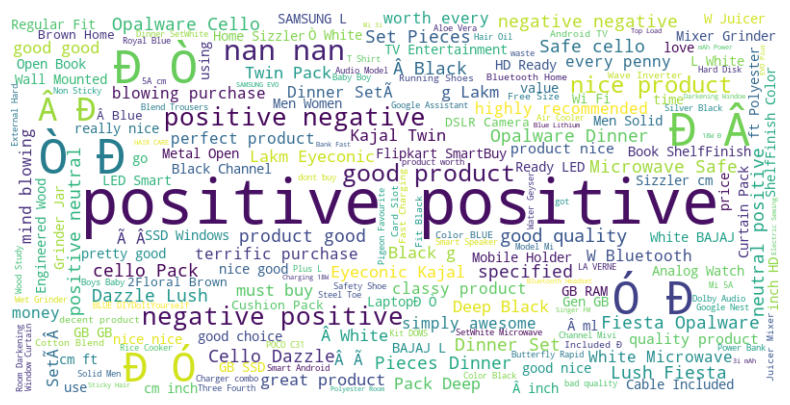

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

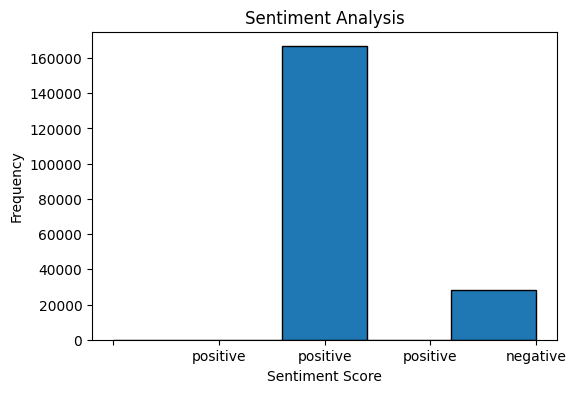

In [ ]:
plt.figure(figsize=(6, 4))
plt.hist(data['Sentiment'], bins=5, range=(-1, 1), edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis')
plt.xticks([-1, -0.5, 0, 0.5, 1])
plt.show()

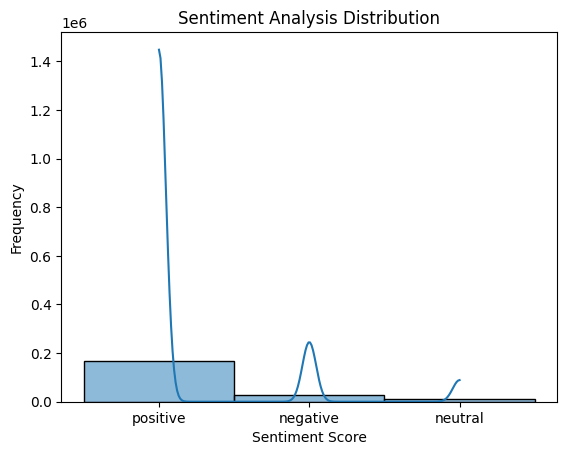

In [ ]:
sns.histplot(data['Sentiment'], bins=10, kde=True)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis Distribution')
plt.show()

In [ ]:
columns = ['Review', 'product_name', 'Summary', 'Sentiment']


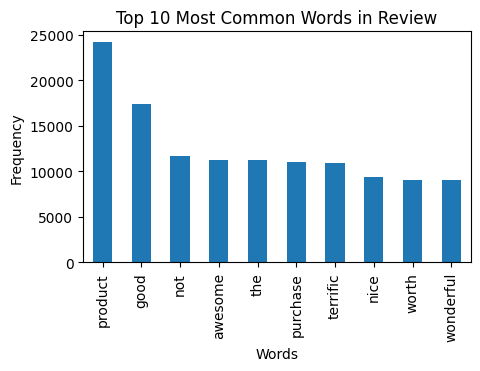

D:\anaconda\envs\python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


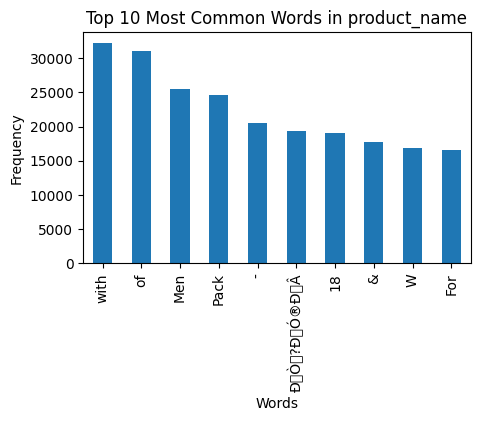

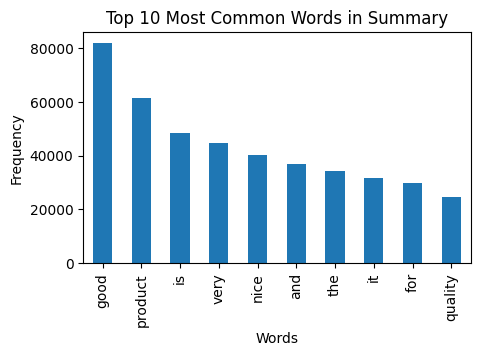

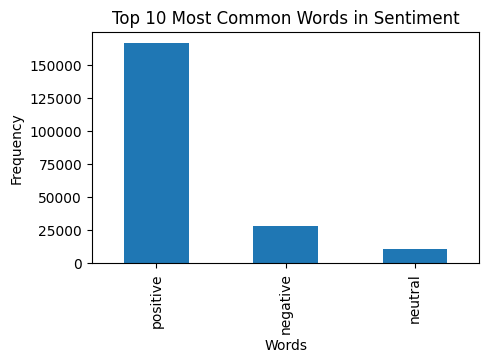

In [ ]:
for column in columns:
    text_data = data[column].fillna('').astype(str)
    all_words = ' '.join(text_data).split()
    word_counts = pd.Series(all_words).value_counts()
    N = 10
    top_words = word_counts[:N]
    plt.figure(figsize=(5, 3))
    top_words.plot(kind='bar')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Top {} Most Common Words in {}'.format(N, column))
    plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np


In [ ]:
text_column = 'Review'

In [ ]:
text_data = data[text_column].fillna('').astype(str)

In [ ]:
vectorizer = TfidfVectorizer()


In [ ]:
tfidf_matrix = vectorizer.fit_transform(text_data)


In [ ]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names())


D:\anaconda\envs\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
correlation_matrix = tfidf_df.corr()


In [ ]:
correlation_matrix

,10,100,10k,10mins,11,1100,11th,12,150,1599,...,year,years,yes,yet,yield,you,your,yr,zero,zip
10,1.000000,-0.000010,-0.000006,-0.000006,-0.000012,0.300582,-0.000006,-0.000006,-0.000006,-0.000006,...,-0.000009,-0.000011,-0.000006,-0.000009,-0.000006,-0.000028,-0.000211,-0.000006,-0.000006,-0.000006
100,-0.000010,1.000000,-0.000008,-0.000008,-0.000017,-0.000008,-0.000008,-0.000008,-0.000008,-0.000008,...,-0.000012,-0.000014,-0.000008,-0.000012,-0.000008,-0.000038,-0.000289,-0.000008,-0.000008,-0.000008
10k,-0.000006,-0.000008,1.000000,-0.000005,-0.000010,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,...,-0.000007,-0.000008,-0.000005,-0.000007,-0.000005,-0.000022,-0.000169,-0.000005,-0.000005,-0.000005
10mins,-0.000006,-0.000008,-0.000005,1.000000,-0.000010,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,...,-0.000007,-0.000008,-0.000005,-0.000007,-0.000005,-0.000022,-0.000169,-0.000005,-0.000005,-0.000005
11,-0.000012,-0.000017,-0.000010,-0.000010,1.000000,-0.000010,-0.000010,-0.000010,-0.000010,-0.000010,...,-0.000014,-0.000017,-0.000010,-0.000014,-0.000010,-0.000044,-0.000335,-0.000010,-0.000010,-0.000010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
you,-0.000028,-0.000038,-0.000022,-0.000022,-0.000044,-0.000022,-0.000022,-0.000022,-0.000022,-0.000022,...,-0.000031,-0.000039,-0.000022,-0.000031,-0.000022,1.000000,0.000941,-0.000022,-0.000022,-0.000022
your,-0.000211,-0.000289,-0.000169,-0.000169,-0.000335,-0.000169,-0.000169,-0.000169,-0.000169,-0.000169,...,-0.000237,-0.000292,-0.000169,-0.000235,-0.000169,0.000941,1.000000,-0.000169,-0.000169,-0.000169
yr,-0.000006,-0.000008,-0.000005,-0.000005,-0.000010,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,...,-0.000007,-0.000008,-0.000005,-0.000007,-0.000005,-0.000022,-0.000169,1.000000,-0.000005,-0.000005
zero,-0.000006,-0.000008,-0.000005,-0.000005,-0.000010,-0.000005,-0.000005,-0.000005,-0.000005,-0.000005,...,-0.000007,-0.000008,-0.000005,-0.000007,-0.000005,-0.000022,-0.000169,-0.000005,1.000000,-0.000005


In [ ]:
sentiment_mapping = {
    'positive': 1,
    'neg': 0,
    'neutral': 2,
    'negative': 0  # Add mapping for 'negative' sentiment label
}

In [ ]:
data['Sentiment_Numeric'] = data['Sentiment'].map(sentiment_mapping)


In [ ]:
data = data[pd.to_numeric(data['product_price'], errors='coerce').notnull()]
data = data[pd.to_numeric(data['Rate'], errors='coerce').notnull()]

In [ ]:
data

,product_name,product_price,Rate,Review,Summary,Sentiment,Sentiment_Numeric
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive,1
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive,1
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive,1
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative,0
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral,2
...,...,...,...,...,...,...,...
205047,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,must buy!,good product,positive,1
205048,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,super!,nice,positive,1
205049,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice,very nice and fast delivery,positive,1
205050,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,awesome product,positive,1


In [ ]:
$$ for text feauture $$ KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix


In [ ]:
data['Review'].fillna('', inplace=True)


In [ ]:
text_feature = 'Review'  # Replace with your text feature column


In [ ]:
target = 'Sentiment_Numeric'  # Replace with your target column


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[text_feature], data[target], test_size=0.2, random_state=42)


In [ ]:
vectorizer = TfidfVectorizer()


In [ ]:
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the test data using the fitted vectorizer
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
print("Training data shape:", X_train_tfidf.shape)
print("Test data shape:", X_test_tfidf.shape)

Training data shape: (164039, 1110)
Test data shape: (41010, 1110)


In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn_classifier.fit(X_train_tfidf, y_train)


KNeighborsClassifier()

In [ ]:
y_pred = knn_classifier.predict(X_test_tfidf)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8968788100463302


In [ ]:
cm = confusion_matrix(y_test, y_pred)


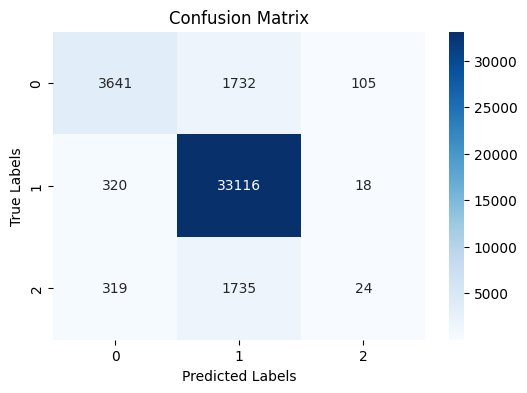

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
$$ it is for numeric features $$  KNN

In [ ]:
features = data[['product_price', 'Rate']]  # Replace with your feature columns


In [ ]:
target = data['Sentiment_Numeric']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)


In [ ]:
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
y_pred = knn_classifier.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9084613508900268


In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      5478
           1       0.94      0.97      0.95     33454
           2       0.27      0.05      0.09      2078

    accuracy                           0.91     41010
   macro avg       0.66      0.62      0.62     41010
weighted avg       0.88      0.91      0.89     41010



In [ ]:
cm = confusion_matrix(y_test, y_pred)


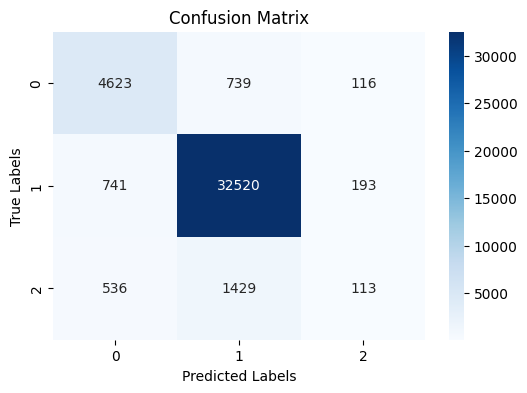

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
$ CNN MODEL $

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[text_feature], data[target], test_size=0.2, random_state=42)


In [ ]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
X_train_tokens = tokenizer.texts_to_sequences(X_train)
X_test_tokens = tokenizer.texts_to_sequences(X_test)

In [ ]:
max_sequence_length = 100
X_train_pad = pad_sequences(X_train_tokens, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_tokens, maxlen=max_sequence_length)

In [ ]:
embedding_dim = 100
vocab_size = len(tokenizer.word_index) + 1
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_sequence_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
batch_size = 512
epochs = 1
model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_pad, y_test))


321/321 [==============================] - 87s 272ms/step - loss: -3270.3320 - accuracy: 0.8105 - val_loss: -5024.1792 - val_accuracy: 0.8158


In [ ]:
loss, accuracy = model.evaluate(X_test_pad, y_test)


1282/1282 [==============================] - 12s 9ms/step - loss: -5024.1807 - accuracy: 0.8158


In [ ]:
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Test Loss: -5024.1806640625
Test Accuracy: 0.8157522678375244
